<a href="https://colab.research.google.com/github/rjtjs/Notebooks/blob/main/ml/LogisticRegressionUsingTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)
N, D = X_train.shape

In [61]:
def plot_feature_means(x, labels):
  means = x.mean(axis=0)
  plt.plot(means, 'ro')
  plt.xticks(range(D), labels=labels, rotation=90)  
  plt.xlabel('Feature')
  plt.ylabel('Feature mean')
  plt.grid(True)
  plt.show()

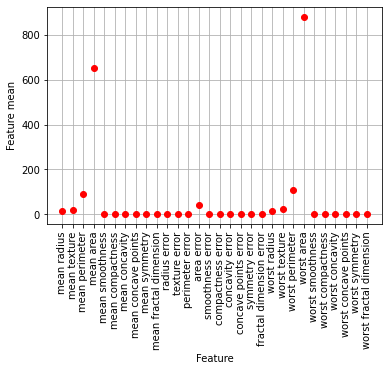

In [62]:
plot_feature_means(X_train, dataset.feature_names)

The features vary wildly numerically, so center and scale them.

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

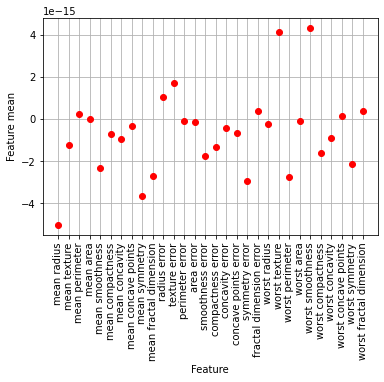

In [64]:
plot_feature_means(X_train, dataset.feature_names)

Data is now centered.

### The Model

Network has an input layer followed by a single output node with sigmoid activation function. In effect, the output of the network is going to be
$\hat{y} = \sigma\left(w^Tx\right)$ given input $x$. Therefore, estimating parameters $w$ is exactly the logistic regression problem.

In [65]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [66]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [67]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

### Training Loss

Text(0.5, 1.0, 'Model fit performance')

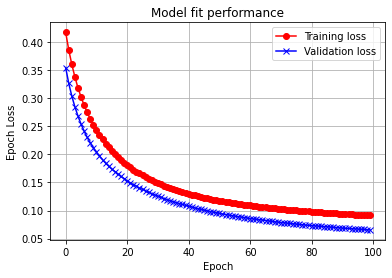

In [68]:
plt.plot(r.history['loss'], 'ro-', label='Training loss')
plt.plot(r.history['val_loss'], 'bx-', label='Validation loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Epoch Loss')
plt.legend()
plt.title('Model fit performance')

### Training Accuracy

Text(0.5, 1.0, 'Model fit performance')

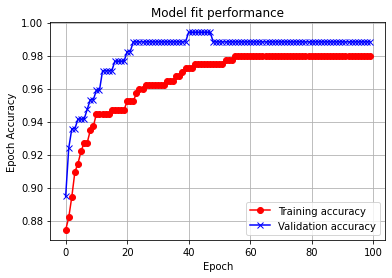

In [69]:
plt.plot(r.history['accuracy'], 'ro-', label='Training accuracy')
plt.plot(r.history['val_accuracy'], 'bx-', label='Validation accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Epoch Accuracy')
plt.legend()
plt.title('Model fit performance')

### Making Predictions

In [70]:
y_hat = model.predict(X_test)

### Predictive Performance

In [71]:
y_hat = np.round(y_hat).flatten()
accuracy = np.mean(y_hat == y_test)
print(f'Test accuracy = {accuracy:.4f}%')

Test accuracy = 0.9883%


In [72]:
# Using inbuilts
accuracy = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9883
